In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [44]:
dataset= pd.read_csv("stroke data.csv")
dataset.head(500)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,34299,Female,71.0,0,0,Yes,Private,Urban,93.28,34.7,never smoked,0
496,54375,Male,5.0,0,0,No,children,Rural,122.19,35.0,Unknown,0
497,37832,Female,14.0,0,0,No,children,Rural,129.53,21.3,never smoked,0
498,21058,Female,15.0,0,0,No,children,Rural,114.53,29.1,Unknown,0


In [45]:
print(dataset.columns.tolist())

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [47]:
dataset.isnull().sum()
dataset = dataset.dropna()    #Dropping rows with null values

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [49]:
print(dataset.describe())

                 id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115      0.288875       0.216934   
min       77.000000     0.080000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%           113.570000    33.100000     0

In [50]:
# select numerical features
features_num = ['age', 'avg_glucose_level','bmi']

In [51]:
# basic stats
print(dataset[features_num].describe())

               age  avg_glucose_level          bmi
count  4909.000000        4909.000000  4909.000000
mean     42.865374         105.305150    28.893237
std      22.555115          44.424341     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.070000    23.500000
50%      44.000000          91.680000    28.100000
75%      60.000000         113.570000    33.100000
max      82.000000         271.740000    97.600000


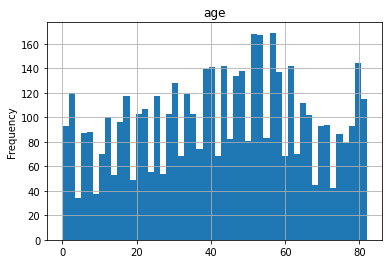

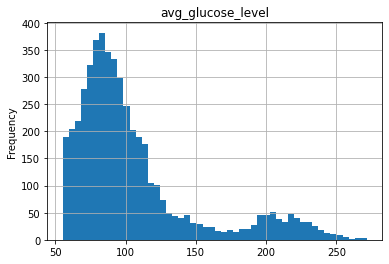

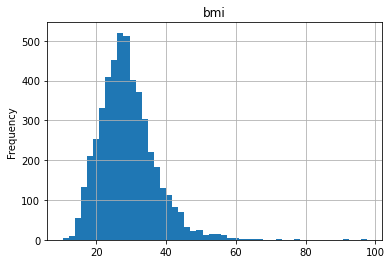

In [52]:
for f in features_num:
    dataset[f].plot(kind='hist', bins=50)
    plt.title(f)
    plt.grid()
    plt.show()

In [53]:
#categorical features
features_cat = ['gender','hypertension','heart_disease','ever_married',
                'work_type','Residence_type','smoking_status']

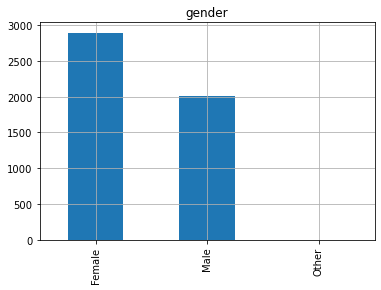

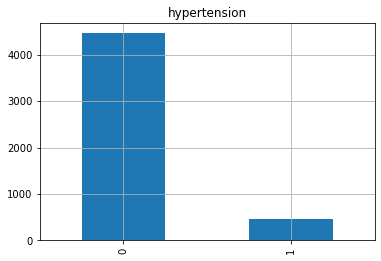

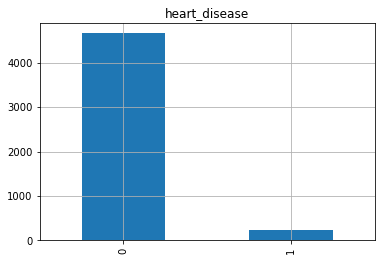

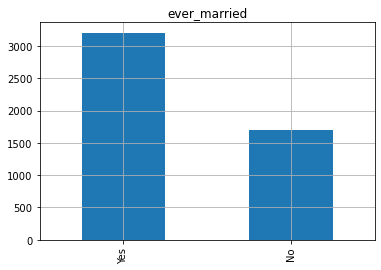

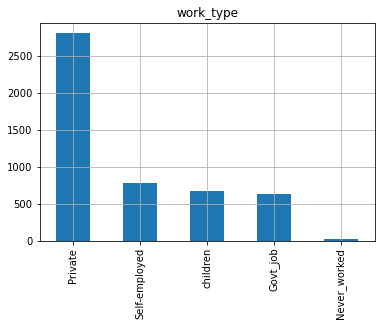

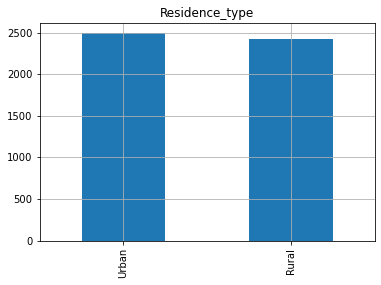

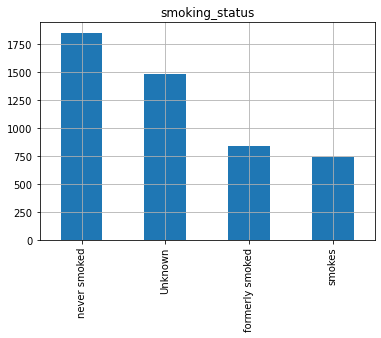

In [54]:
for f in features_cat:
    dataset[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

In [55]:
dataset =  dataset[dataset.columns].replace({'Yes':1, 'No':0, 'Urban':1,'Rural':0})
dataset =  dataset[dataset.columns].replace({'Female':1, 'Male':0, 'Other':2,  
                                             'never smoked':0,  'formerly smoked':1, 'smokes':3, 'Unknown':4,
                                            'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4})

<AxesSubplot:>

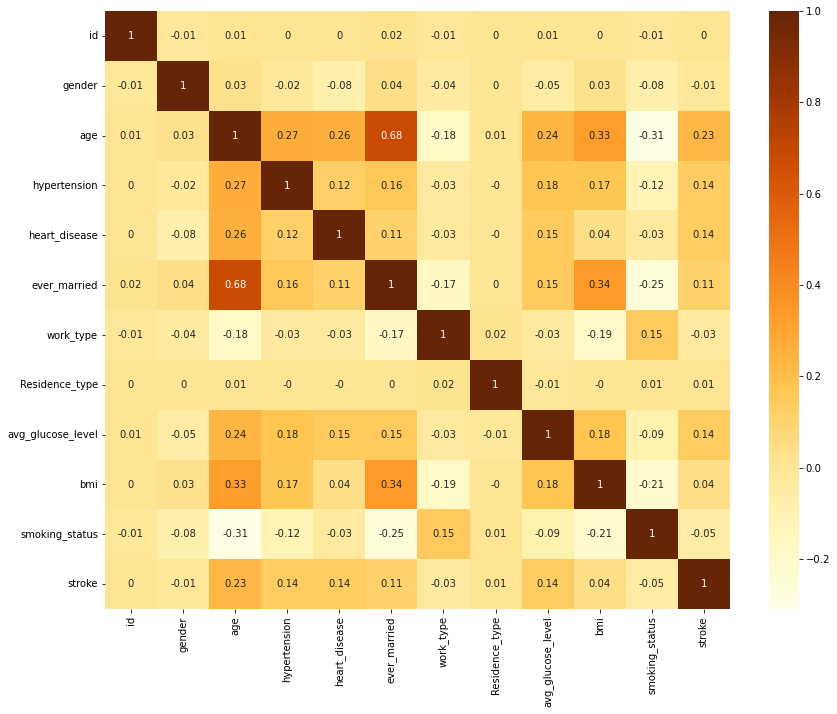

In [56]:
correlation = dataset.corr().round(2)
plt.figure(figsize = (14,11))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [57]:
dataset. drop("id", axis=1, inplace=True)
dataset. drop("Residence_type", axis=1, inplace=True)

<AxesSubplot:>

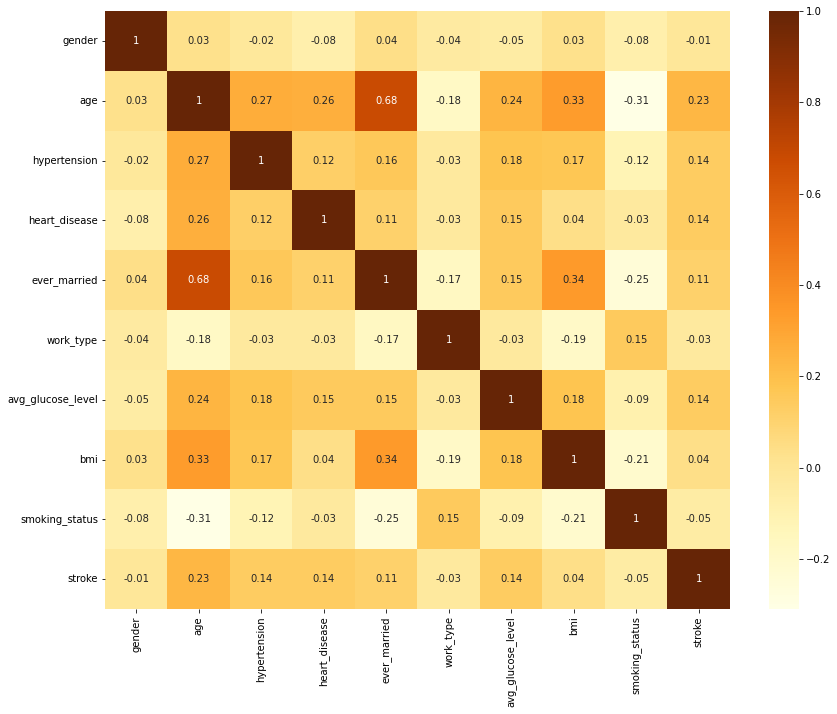

In [58]:
correlation = dataset.corr().round(2)
plt.figure(figsize = (14,11))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [60]:
from sklearn.preprocessing import StandardScaler 
colums = [ 'age', 'avg_glucose_level', 'bmi']
Sc = StandardScaler()
dataset[colums] = Sc.fit_transform(dataset[colums])

In [61]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1.070138,0,1,1,0,2.777698,0.981345,1,1
2,0,1.646563,0,1,1,0,0.013842,0.459269,0,1
3,1,0.272012,0,0,1,0,1.484132,0.701207,3,1
4,1,1.602222,1,0,1,1,1.549193,-0.623083,0,1
5,0,1.690903,0,0,1,0,1.821368,0.013595,1,1


In [62]:
#Preprocessing
from sklearn.feature_selection import SelectKBest
array= dataset.values
X= array[:,0:9] #inputs
Y= array[:,9] #output

In [63]:
print(X)
print(Y)

[[ 0.          1.07013796  0.         ...  2.77769839  0.98134488
   1.        ]
 [ 0.          1.64656262  0.         ...  0.0138418   0.45926914
   0.        ]
 [ 1.          0.27201152  0.         ...  1.48413156  0.70120668
   3.        ]
 ...
 [ 1.         -0.34875349  0.         ... -0.50236926  0.21733161
   0.        ]
 [ 0.          0.36069224  0.         ...  1.37291993 -0.41934612
   1.        ]
 [ 1.          0.05030973  0.         ... -0.45081569 -0.34294479
   4.        ]]
[1. 1. 1. ... 0. 0. 0.]


In [64]:
# split  into a training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [65]:
print(X_train)
print(X_test)

[[ 1.          0.36069224  0.         ...  0.00483681  0.24279872
   0.        ]
 [ 1.          0.05030973  0.         ... -0.65297772  0.20459805
   0.        ]
 [ 1.          1.29183975  1.         ...  2.53231241 -0.35567835
   1.        ]
 ...
 [ 0.         -1.27990101  0.         ... -0.99651809 -1.43803048
   4.        ]
 [ 0.          1.33618011  0.         ... -0.47715528 -0.12647436
   0.        ]
 [ 1.          1.29183975  0.         ... -0.90466719 -0.07554015
   0.        ]]
[[ 1.         -0.92517814  0.         ... -0.87832759 -1.0687574
   3.        ]
 [ 1.         -1.36858172  0.         ...  0.2421183  -0.38114545
   4.        ]
 [ 0.          0.00596937  0.         ...  0.85828475  2.16556545
   4.        ]
 ...
 [ 1.         -0.9695185   0.         ... -0.76463959 -0.62308299
   0.        ]
 [ 0.          1.20315904  0.         ... -0.73717437  0.1918645
   1.        ]
 [ 1.          1.73524333  1.         ...  0.23423893  0.28099938
   1.        ]]


In [66]:
# build our model

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [67]:
#Train the model using the training sets
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [68]:
#Predict the response for test dataset
Y_pred = knn.predict(X_test)

In [69]:
#Model Evaluation
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test, Y_pred))
print("Accuracy:",accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1404
         1.0       0.20      0.01      0.03        69

    accuracy                           0.95      1473
   macro avg       0.58      0.51      0.50      1473
weighted avg       0.92      0.95      0.93      1473

Accuracy: 0.9511201629327902


In [70]:
#elbow method
#Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

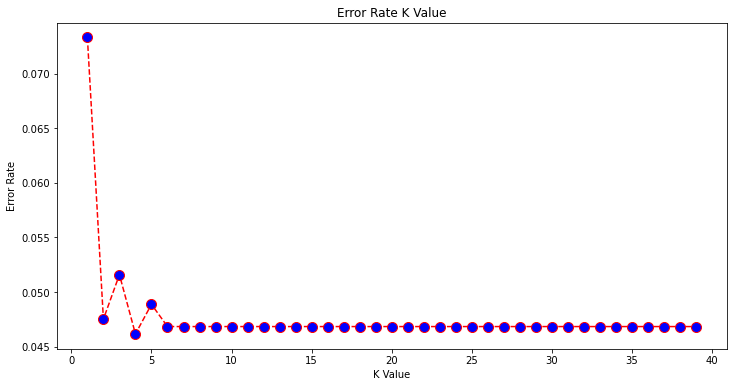

In [71]:
#plot the error values against K values.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [72]:
import pickle
pickle.dump(knn,open('model.pkl','wb'))